In [1]:
# necessary imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [2]:
# loading data

df= pd.read_csv('./kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(400, 26)

In [4]:
# dropping id column
df.drop({'id'}, axis = 1, inplace = True)

In [5]:
# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [6]:
df.drop(['blood_glucose_random','white_blood_cell_count','blood_urea','serum_creatinine','potassium' ,'sodium','haemoglobin',
'packed_cell_volume','red_blood_cell_count','blood_pressure','albumin','specific_gravity','bacteria','sugar','coronary_artery_disease','pus_cell_clumps'], axis=1, inplace = True)

In [7]:
df.describe()

,age
count,391.000000
mean,51.483376
std,17.169714
min,2.000000
25%,42.000000
50%,55.000000
75%,64.500000
max,90.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                391 non-null    float64
 1   red_blood_cells    248 non-null    object 
 2   pus_cell           335 non-null    object 
 3   hypertension       398 non-null    object 
 4   diabetes_mellitus  398 non-null    object 
 5   appetite           399 non-null    object 
 6   peda_edema         399 non-null    object 
 7   aanemia            399 non-null    object 
 8   class              400 non-null    object 
dtypes: float64(1), object(8)
memory usage: 28.2+ KB


In [9]:
# converting necessary columns to numerical type




In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                391 non-null    float64
 1   red_blood_cells    248 non-null    object 
 2   pus_cell           335 non-null    object 
 3   hypertension       398 non-null    object 
 4   diabetes_mellitus  398 non-null    object 
 5   appetite           399 non-null    object 
 6   peda_edema         399 non-null    object 
 7   aanemia            399 non-null    object 
 8   class              400 non-null    object 
dtypes: float64(1), object(8)
memory usage: 28.2+ KB


In [11]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [12]:
# looking at unique values in categorical columns

for col in df:
    print(f"{col} has {len(df[col].unique())} values\n")

age has 77 values

red_blood_cells has 3 values

pus_cell has 3 values

hypertension has 3 values

diabetes_mellitus has 6 values

appetite has 3 values

peda_edema has 3 values

aanemia has 3 values

class has 3 values



In [13]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)


df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [14]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [15]:
cols = ['diabetes_mellitus', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

class has [0 1] values



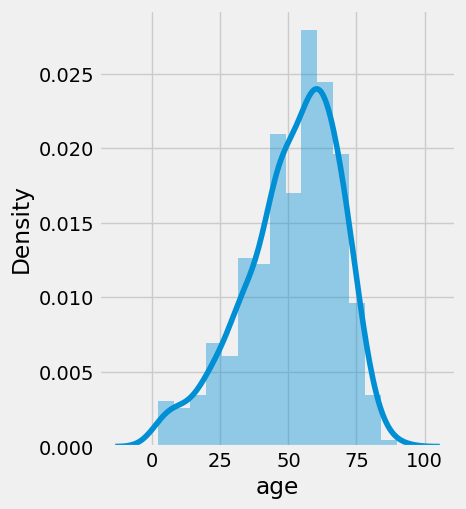

In [16]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

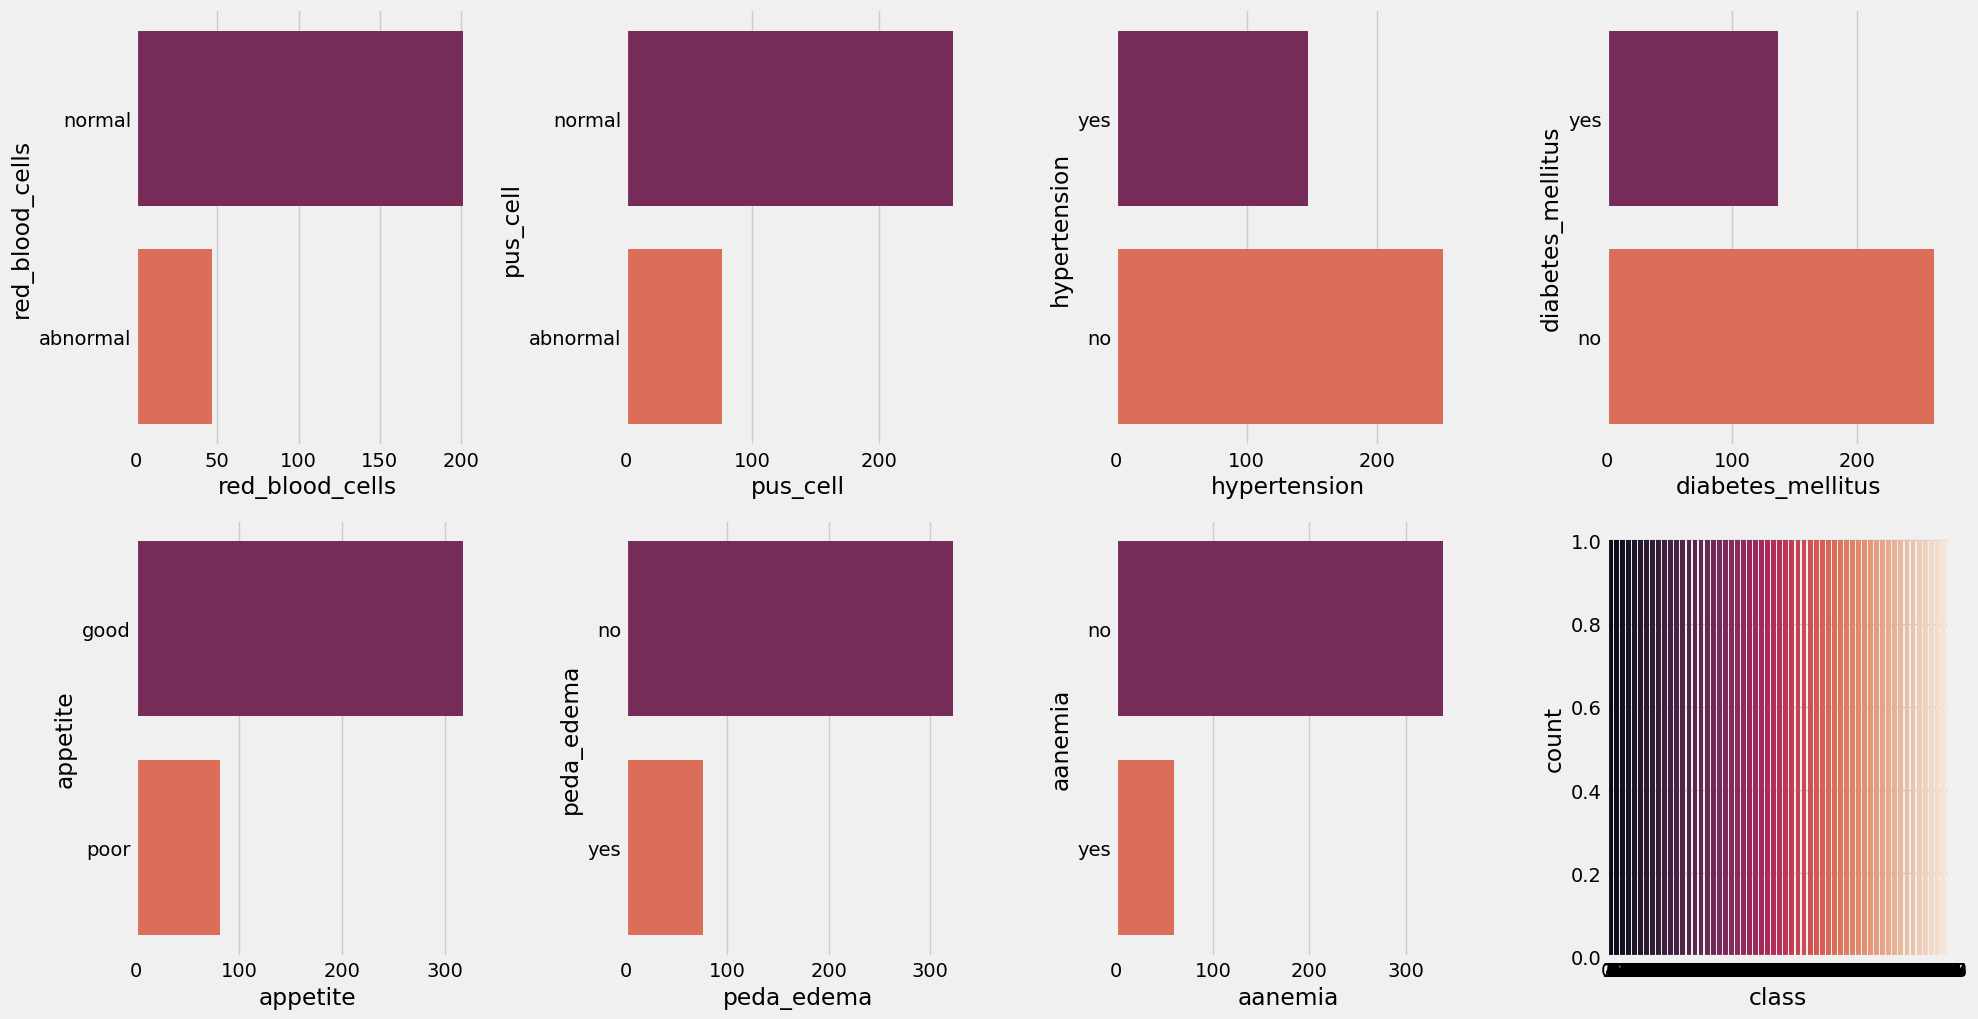

In [17]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [18]:
df.columns

Index(['age', 'red_blood_cells', 'pus_cell', 'hypertension',
       'diabetes_mellitus', 'appetite', 'peda_edema', 'aanemia', 'class'],
      dtype='object')

<a id = '2.0'></a>
<p style = "font-size : 40px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Exploratory Data Analysis (EDA)</strong></p> 

In [19]:
# defining functions to create plot

def violin(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(df, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    
def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="class", template = 'plotly_dark')
    return fig.show()

<a id = '3.0'></a>
<p style = "font-size : 40px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Data Pre Processing</strong></p> 

In [20]:
# checking for null values

df.isna().sum().sort_values(ascending = False)

red_blood_cells      152
pus_cell              65
age                    9
hypertension           2
diabetes_mellitus      2
appetite               1
peda_edema             1
aanemia                1
class                  0
dtype: int64

In [21]:
df[num_cols].isnull().sum()

age    9
dtype: int64

In [22]:
df[cat_cols].isnull().sum()

red_blood_cells      152
pus_cell              65
hypertension           2
diabetes_mellitus      2
appetite               1
peda_edema             1
aanemia                1
class                  0
dtype: int64

In [23]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [24]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [25]:
df[num_cols].isnull().sum()

age    0
dtype: int64

In [26]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [27]:
df[cat_cols].isnull().sum()

red_blood_cells      0
pus_cell             0
hypertension         0
diabetes_mellitus    0
appetite             0
peda_edema           0
aanemia              0
class                0
dtype: int64

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>All the missing values are handeled now, lets do ctaegorical features encding now</strong></p> 

<a id = '4.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Feature Encoding</strong></p> 

In [28]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>As all of the categorical columns have 2 categories we can use label encoder</strong></p> 

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [30]:

corr=df.corr()
corr

,age,red_blood_cells,pus_cell,hypertension,diabetes_mellitus,appetite,peda_edema,aanemia,class
age,1.000000,-0.037692,-0.123603,0.397122,0.368957,0.153531,0.088728,0.058961,-0.228693
red_blood_cells,-0.037692,1.000000,0.237582,-0.181926,-0.224199,-0.183628,-0.191926,-0.143330,0.358328
pus_cell,-0.123603,0.237582,1.000000,-0.294465,-0.209922,-0.285530,-0.360479,-0.264717,0.374010
hypertension,0.397122,-0.181926,-0.294465,1.000000,0.608118,0.345070,0.371026,0.347802,-0.590438
diabetes_mellitus,0.368957,-0.224199,-0.209922,0.608118,1.000000,0.325134,0.308463,0.183686,-0.559060
appetite,0.153531,-0.183628,-0.285530,0.345070,0.325134,1.000000,0.417055,0.254942,-0.393341
peda_edema,0.088728,-0.191926,-0.360479,0.371026,0.308463,0.417055,1.000000,0.207025,-0.375154
aanemia,0.058961,-0.143330,-0.264717,0.347802,0.183686,0.254942,0.207025,1.000000,-0.325396
class,-0.228693,0.358328,0.374010,-0.590438,-0.559060,-0.393341,-0.375154,-0.325396,1.000000


<a id = '5.0'></a>
<p style = "font-size : 45px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Model Building</strong></p> 

In [31]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [32]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
for col in df:
    print(f"{col} has {df[col].unique()} values\n")

age has [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 59. 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 67. 15. 55. 44. 26. 64.
 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14. 27.
 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25. 20.
 29. 28. 22. 79.] values

red_blood_cells has [1 0] values

pus_cell has [1 0] values

hypertension has [1 0] values

diabetes_mellitus has [1 0] values

appetite has [0 1] values

peda_edema has [0 1] values

aanemia has [0 1] values

class has [0 1] values



<a id = '5.2'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Decision Tree Classifier</strong></p> 

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.959375
Test Accuracy of Decision Tree Classifier is 0.9125 

Confusion Matrix :- 
[[46  5]
 [ 2 27]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        51
           1       0.84      0.93      0.89        29

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



In [34]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [35]:
# best parameters and best score
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 7, 'splitter': 'best'}
0.94375


In [36]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.934375
Test Accuracy of Decision Tree Classifier is 0.8625 

Confusion Matrix :- 
[[42  9]
 [ 2 27]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.82      0.88        51
           1       0.75      0.93      0.83        29

    accuracy                           0.86        80
   macro avg       0.85      0.88      0.86        80
weighted avg       0.88      0.86      0.86        80



<a id = '5.9'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Extra Trees Classifier</strong></p>

In [37]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 0.959375
Test Accuracy of Extra Trees Classifier is 0.9125 

Confusion Matrix :- 
[[46  5]
 [ 2 27]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        51
           1       0.84      0.93      0.89        29

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



<a id = '6.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Models Comparison</strong></p> 

In [38]:
models = pd.DataFrame({
    'Model' : [ 'Decision Tree Classifier','Extra Trees Classifier'],
    'Score' : [dtc_acc, etc_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Extra Trees Classifier,0.9125
0,Decision Tree Classifier,0.8625


<p style = "font-size : 25px; color : #f55c47 ; font-family : 'Comic Sans MS'; "><strong>If you like my work, don't forget to leave an upvote!!</strong></p> 